In [133]:
import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import sys

dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\Broadband telecom quantum memories\\2022_PrYVO_Spectroscopy\\Visible'
folder = '20221108_0_1%_PrYVO4_absorption_visible_laser'
# Measured data through the crystal, the first one is horizontal polarised and the second one is vertical polarised
files_data=['ABS11815.csv','ABS11816.csv'] 
# Measured references through the empty hole, the first one is horizontal polarised and the second one is vertical polarised
# You can disable this if you do not have the data, and run the third cell please
files_ref =['ABS11707.csv','ABS11706.csv'] 

num_of_files=np.size(files_data)

In [ ]:
# In this cell, we used the measured references as the ref values 
# for calculating the OD
for index in range(num_of_files):
    path_data=dir + '\\' + folder + '\\' + files_data[index]
    path_ref =dir + '\\' + folder + '\\' + files_ref[index]
    data=pd.read_csv(path_data)
    data=data.to_numpy()
    ref =pd.read_csv(path_ref)
    ref =ref.to_numpy()
    print(len(data[:,0]))
    print(len(ref[:,0]))
    #Need to judge the length of all the data
    if len(data[:,0]) != len(ref[:,0]):
        length_data=min(len(data[:,0]),len(ref[:,0]))
        Time=data[0:length_data,0]
        Piezo_trigger_signal=data[0:length_data,1]
        normalised_data=data[0:length_data,2]/data[0:length_data,3] # The transmission siganl is normalised by the reflected reference signal
        normalised_ref=ref[0:length_data,2]/ref[0:length_data,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[0:length_data,2]/data[0:length_data,2])
        print(length_data)
        if index==0:
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.plot(Time, OD, 'r-', label='Horizontal polarised')
            ax1.legend(loc='upper right',fontsize=14)
            ax2.plot(Time, Piezo_trigger_signal, 'b-')
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('OD', color='r')
            ax2.set_ylabel('Piezo signal', color='b')
            fig.patch.set_facecolor('white')
            ax1.grid(True)
            plt.show()

        elif index==1:
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.plot(Time, OD, 'g-', label='Vertical polarised')
            ax1.legend(loc='upper right',fontsize=14)
            ax2.plot(Time, Piezo_trigger_signal, 'b-')
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('OD', color='g')
            ax2.set_ylabel('Piezo signal', color='b')
            fig.patch.set_facecolor('white')
            ax1.grid(True)
            plt.show()
        test=1
    else:
        Piezo_trigger_signal=data[:,1]
        Time=data[:,0]
        normalised_data=data[:,2]/data[:,3]
        normalised_ref=ref[:,2]/ref[:,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[:,2]/data[:,2])
        if index==0:
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.plot(Time, OD1, 'r-', label='Horizontal polarised')
            ax1.legend(loc='upper right',fontsize=14)
            ax2.plot(Time, Piezo_trigger_signal, 'b-')
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('OD', color='r')
            ax2.set_ylabel('Piezo signal', color='b')
            fig.patch.set_facecolor('white')
            ax1.grid(True)
            plt.show()

        elif index==1:
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.plot(Time, OD1, 'g-', label='Vertical polarised')
            ax1.legend(loc='upper right',fontsize=14)
            ax2.plot(Time, Piezo_trigger_signal, 'b-')
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('OD', color='g')
            ax2.set_ylabel('Piezo signal', color='b')
            fig.patch.set_facecolor('white')
            ax1.grid(True)
            plt.show()
        test=0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


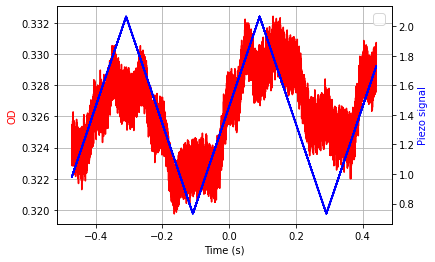

In [134]:
# In this cell, we use the measured transmission signal, when the laser
# polarisation is vertical, as the ref values for calculating the OD
path_data=dir + '\\' + folder + '\\' + files_data[0]
path_ref =dir + '\\' + folder + '\\' + files_data[1]
data=pd.read_csv(path_data)
data=data.to_numpy()
ref =pd.read_csv(path_ref)
ref =ref.to_numpy()

if len(data[:,0]) != len(ref[:,0]):
        length_data=min(len(data[:,0]),len(ref[:,0]))
        Time=data[0:length_data,0]
        Piezo_trigger_signal=data[0:length_data,1]
        normalised_data=data[0:length_data,2]/data[0:length_data,3]
        normalised_ref=ref[0:length_data,2]/ref[0:length_data,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[0:length_data,2]/data[0:length_data,2])
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(Time, OD1, 'r-', label='ln(Vertical/Horizontal)')
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(Time, Piezo_trigger_signal, 'b-')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        #ax1.set_ylim([0,0.18])
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()
else:
        Piezo_trigger_signal=data[:,1]
        Time=data[:,0]
        normalised_data=data[:,2]/data[:,3]
        normalised_ref=ref[:,2]/ref[:,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[:,2]/data[:,2])

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        #ax1.plot(Time, OD1, 'r-', label='ln(Vertical/Horizontal)')
        ax1.plot(Time, OD1, 'r-')
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(Time, Piezo_trigger_signal, 'b-')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        #ax1.set_ylim([0,0.18])
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()

In [132]:
Piezo_min=min(data[:,1])
Piezo_max=max(data[:,1])
print(Piezo_min)
print(Piezo_max)
loc_piezo_min=np.where(data[:,1]==Piezo_min)
loc_piezo_max=np.where(data[:,1]==Piezo_max)
print(loc_piezo_min[0])
print(loc_piezo_max[0])
num_of_one_piezo_period=loc_piezo_max[0]-loc_piezo_min[0]

scanning_central_freq=191.06764 # Unit:THz
scanning_amplitude=50 # Unite:V
Piezo_slope=0.26898 # Unit: GHz/V; When the laser scanning offset is changed 1 V, the frequency will shift 0.26898 GHz
freq_low=scanning_central_freq*1e3-Piezo_slope*scanning_amplitude/2
freq_high=scanning_central_freq*1e3+Piezo_slope*scanning_amplitude/2
freq_scale=np.linspace(freq_low,freq_high,int(num_of_one_piezo_period))

if len(data[:,0]) != len(ref[:,0]):
        length_data=min(len(data[:,0]),len(ref[:,0]))
        Time=data[0:length_data,0]
        Piezo_trigger_signal=data[0:length_data,1]
        normalised_data=data[0:length_data,2]/data[0:length_data,3]
        normalised_ref=ref[0:length_data,2]/ref[0:length_data,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[0:length_data,2]/data[0:length_data,2])
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(freq_scale, OD1[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'r-', label='ln(Vertical/Horizontal)')
        ax1.legend(loc='lower right',fontsize=14)
        ax2.plot(freq_scale, Piezo_trigger_signal[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'b-')
        ax1.set_xlabel('Frequency (GHz)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        #ax1.set_ylim([0,0.18])
        #ax1.set_xlim([freq_low,freq_high])
        xticks = np.linspace(freq_low, freq_high, 4)
        ax1.set_xticks(xticks)
        ax1.ticklabel_format(style='plain')
        ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()
else:
        Piezo_trigger_signal=data[:,1]
        Time=data[:,0]
        normalised_data=data[:,2]/data[:,3]
        normalised_ref=ref[:,2]/ref[:,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[:,2]/data[:,2])

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        #ax1.plot(Time, OD1, 'r-', label='ln(Vertical/Horizontal)')
        ax1.plot(freq_scale, OD1[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'r-')
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(freq_scale, Piezo_trigger_signal[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'b-')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        #ax1.set_ylim([0,0.18])
        #ax1.set_xlim([data[loc_piezo_min[0],0],data[loc_piezo_max[0],0]])
        xticks = np.linspace(freq_low, freq_high, 4)
        ax1.set_xticks(xticks)
        ax1.ticklabel_format(style='plain')
        ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()


0.7300998503803
2.067723874258
[109512]
[23316]


ValueError: Number of samples, -86196, must be non-negative.